In [1]:
import numpy as np
x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11]) 
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

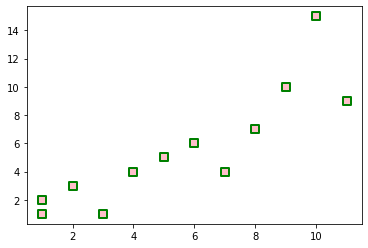

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x_points, y_points, c ="pink", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
plt.show()

# Stochastic Gradient Descent

In [3]:
from sklearn.metrics import r2_score

def SGD(x_points,y_points,alpha,epochs):
    loss_list=[]
    theta0=0
    theta1=0
    iteration=0
    iteration_list=[]
    theta0_list=[]
    theta1_list=[]
    for i in range(epochs):
        for i in range(x_points.shape[0]):
            y_pred=theta0+theta1*x_points[i]
            lossfun=(1/2)*((y_pred-y_points[i])**2)
            loss_list.append(lossfun)
            theta0=theta0-alpha*(y_pred-y_points[i])
            theta0_list.append(theta0)
            theta1=theta1-alpha*((y_pred-y_points)*x_points[i])
            theta1_list.append(theta1)
            iteration_list.append(iteration)
            iteration+=1
            
    hypothesis=theta0+theta1*x_points
    print("accuracy=",r2_score(y_points,hypothesis)*100,"%")
    return theta0,theta1,theta0_list,theta1_list,loss_list,iteration_list

In [4]:
theta0,theta1,theta0_list,theta1_list,loss_list,iteration_list=SGD(x_points,y_points,0.01,10)

accuracy= 73.15205603084249 %


In [5]:
theta0,theta1,theta0_list,theta1_list,loss_list,iteration_list=SGD(x_points,y_points,0.001,30)

accuracy= 80.11299503236671 %


Text(0.5, 1.0, 'y-pred vs featues')

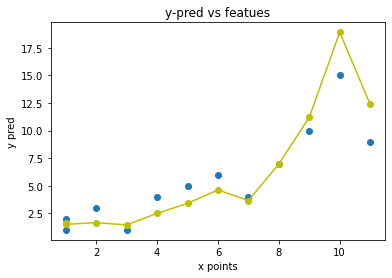

In [6]:
fig, ax = plt.subplots()
y_pred=theta0+theta1*x_points
ax.scatter(x_points,y_points)
ax.plot(x_points, y_pred,marker="o",color="y")
ax.set_xlabel("x points")
ax.set_ylabel("y pred")
ax.set_title("y-pred vs featues")

# minibatch Gradient Descent

In [7]:
def minibatchGD(x_points,y_points,alpha,batch_size,epoch):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    #theta0=0
    #theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    #print("mat_ones",mat_ones.shape)
    data=np.stack((mat_ones,x_points),axis=1) #(50,2)
   # print("data",data)
    y_predkbera=[]
    y_predlist=[]
    max_iter=int(m/batch_size)
    iteration=0
    iteration_list=[]
    for i in range(epoch): 
          j=0
          p=batch_size
          for i in range(max_iter):
            X=data[j:p,:]
            y_pred=np.dot(X,theta)
            y_predlist.append(y_pred)
            y_pointsnew=y_points[j:p]
            z=y_pred-y_pointsnew
            grad=(1/batch_size)*np.dot(X.T,z)
            lossfun=(1/(2*batch_size))*(np.sum((y_pred-y_pointsnew)**2))
            epochs.append(i)
            theta=theta-alpha*grad
            theta0_list.append(theta[0])
            theta1_list.append(theta[1])
            f=j
            j=p
            p=f+batch_size
            loss_list.append(lossfun)
            iteration_list.append(iteration)
            iteration+=1
          if (np.linalg.norm(grad)<0.001):
                break
    theta0=theta[0]
    theta1=theta[1]
    hypothesis=theta0+theta1*x_points
    print("accuracy=",r2_score(y_points,hypothesis)*100,"%")
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list
   

In [8]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list=minibatchGD(x_points,y_points,0.01,10,10)

accuracy= 71.49758585403767 %


Text(0.5, 1.0, 'y-pred vs featues')

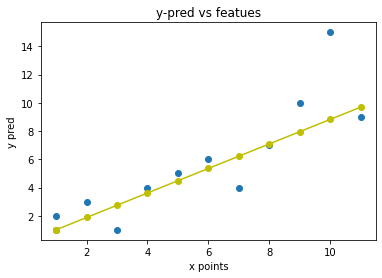

In [9]:
fig, ax = plt.subplots()
y_pred=theta0+theta1*x_points
ax.scatter(x_points,y_points)
ax.plot(x_points, y_pred,marker="o",color="y")
ax.set_xlabel("x points")
ax.set_ylabel("y pred")
ax.set_title("y-pred vs featues")

# Momentum Gradient Descent

In [10]:
def momentumGD(x_points,y_points,epoch,alpha,gamma):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
  #  print(data)
    vprev=0
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
        #  print(y_pred)
          z=y_pred-y_points
         # print("z",z)
          grad=(1/m)*np.dot(data.T,z)
          #print("grad",grad)
          vinit=gamma*vprev+alpha*grad
          #print("vinit",vinit)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta=theta-vinit
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          vprev=vinit
         # print("vprev",vprev)
          if (np.linalg.norm(grad)<0.001):
                break
         # break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list

In [11]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,40,0.01,0.9)
print("------------------------------------")
theta0a,theta1a,epochsa,loss_lista,theta0_lista,theta1_lista=momentumGD(x_points,y_points,300,0.0005,0.5)
print("------------------------------------")
theta0b,theta1b,epochsb,loss_listb,theta0_listb,theta1_listb=momentumGD(x_points,y_points,20,0.012,0.9)
print("------------------------------------")
theta0c,theta1c,epochsc,loss_listc,theta0_listc,theta1_listc=momentumGD(x_points,y_points,10,0.02,0.9)
print("------------------------------------")
theta0d,theta1d,epochsd,loss_listd,theta0_listd,theta1_listd=momentumGD(x_points,y_points,35,0.01,0.9)
print("------------------------------------")
theta0d,theta1d,epochsd,loss_listd,theta0_listd,theta1_listd=momentumGD(x_points,y_points,50,0.001,0.9)

accuracy= 75.40886627057479 %
theta 0 -0.06624100891469606
theta 1 1.1213784645761362
------------------------------------
accuracy= 75.58319260659975 %
theta 0 0.10655530925730189
theta 1 0.9955229505428881
------------------------------------
accuracy= 66.8219267579183 %
theta 0 0.06142892404379121
theta 1 1.3508921675004337
------------------------------------
accuracy= -54.1545588235292 %
theta 0 0.11402864430722706
theta 1 1.3910174838746319
------------------------------------
accuracy= 75.70302282797066 %
theta 0 -0.06878175753896484
theta 1 0.9171940183272749
------------------------------------
accuracy= 74.43562223965013 %
theta 0 0.10398496709395931
theta 1 1.0489138983500848


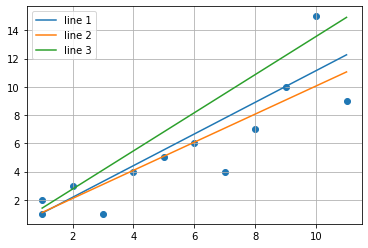

In [12]:
y_pred=theta0+theta1*x_points
y_preda=theta0a+theta1a*x_points
y_predb=theta0b+theta1b*x_points
y_predc=theta0c+theta1c*x_points
y_predd=theta0d+theta1d*x_points
plt.plot(x_points,y_pred, label = "line 1")
plt.plot(x_points,y_preda, label = "line 2")
plt.plot(x_points, y_predb, label = "line 3")
#plt.plot(X, y_predc, label = "0.02-10")
plt.scatter(x_points,y_points)
plt.legend()
plt.grid()
plt.show()

# Nesterov optimizer

In [14]:
def NAGGD(x_points,y_points,epoch,alpha,gamma):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
    vprev=0
    for i in range(epoch): 
          thetatemp=theta-gamma*vprev
          y_predtemp=np.dot(data,thetatemp)
          z=y_predtemp-y_points
          gradtemp=(1/m)*np.dot(data.T,z)
          theta=thetatemp-alpha*gradtemp
          vinit=gamma*vprev+alpha*gradtemp
          y_pred=np.dot(data,theta)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          vprev=vinit
          if (np.linalg.norm(gradtemp)<0.001):
            break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list

In [15]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=NAGGD(x_points,y_points,300,0.0005,0.9)
print("------------------------------------")
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=NAGGD(x_points,y_points,70,0.01,0.9)
print("------------------------------------")
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=NAGGD(x_points,y_points,80,0.01,0.9)
print("------------------------------------")
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=NAGGD(x_points,y_points,90,0.01,0.9)
print("------------------------------------")
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=NAGGD(x_points,y_points,170,0.01,0.9)

accuracy= 75.65892706827997 %
theta 0 0.024072631219526297
theta 1 1.0064909357892395
------------------------------------
accuracy= 75.74675980096362 %
theta 0 -0.16457638988376588
theta 1 1.0315738325622983
------------------------------------
accuracy= 75.74858727321723 %
theta 0 -0.17890481721103174
theta 1 1.0334789500977066
------------------------------------
accuracy= 75.74945260509563 %
theta 0 -0.18883515153087677
theta 1 1.0347992941242574
------------------------------------
accuracy= 75.75017719039478 %
theta 0 -0.20626215442755874
theta 1 1.0371164003157203


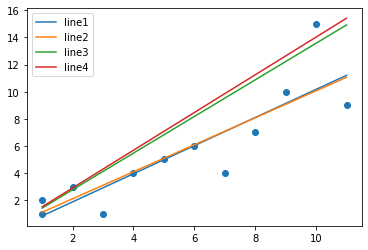

In [16]:
y_pred=theta0+theta1*x_points
y_preda=theta0a+theta1a*x_points
y_predb=theta0b+theta1b*x_points
y_predc=theta0c+theta1c*x_points
y_predd=theta0d+theta1d*x_points
plt.plot(x_points,y_pred, label = "line1")
plt.plot(x_points,y_preda, label = "line2")
plt.plot(x_points, y_predb, label = "line3")
plt.plot(x_points, y_predc, label = "line4")
plt.scatter(x_points,y_points)
plt.legend()
plt.show()